# Image Classification

- CIFAR 10 Dataset (In-built)

#### CIFAR-10 consists of 60,000 32x32 color images in 10 different classes, with each class containing 6,000 images. 
These images are divided into a training set of 50,000 images and a test set of 10,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


### Step 1: Import necessary libraries

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

### Step 2: Load and preprocess the CIFAR-10 dataset

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 84s 0us/step


### Step 3: Create a deep learning model

In [3]:
# Create a deep learning model
model = models.Sequential([
    # Step 4: Convolutional Layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Step 5: Flatten the output
    layers.Flatten(),

    # Step 6: Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile the model

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 5: Train the model

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3452 - loss: 1.7690 - val_accuracy: 0.5345 - val_loss: 1.2823
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5631 - loss: 1.2187 - val_accuracy: 0.6119 - val_loss: 1.1077
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6321 - loss: 1.0521 - val_accuracy: 0.6382 - val_loss: 1.0353
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6674 - loss: 0.9471 - val_accuracy: 0.6601 - val_loss: 0.9830
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6970 - loss: 0.8591 - val_accuracy: 0.6759 - val_loss: 0.9234
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7223 - loss: 0.7890 - val_accuracy: 0.6929 - val_loss: 0.8871
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7435 - loss: 0.7387 - val_accuracy: 0.6952 - val_loss: 0.9036
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7595 -

### Step 6: Evaluate the model

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6993 - loss: 0.8821
Test accuracy: 0.7013999819755554


### Step 7: Visualize training history

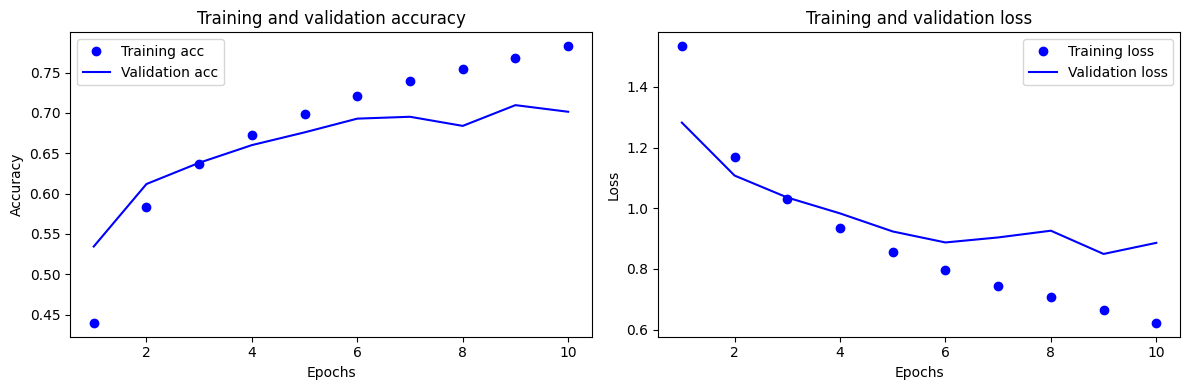

In [7]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

### Step 8: Visualize example predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


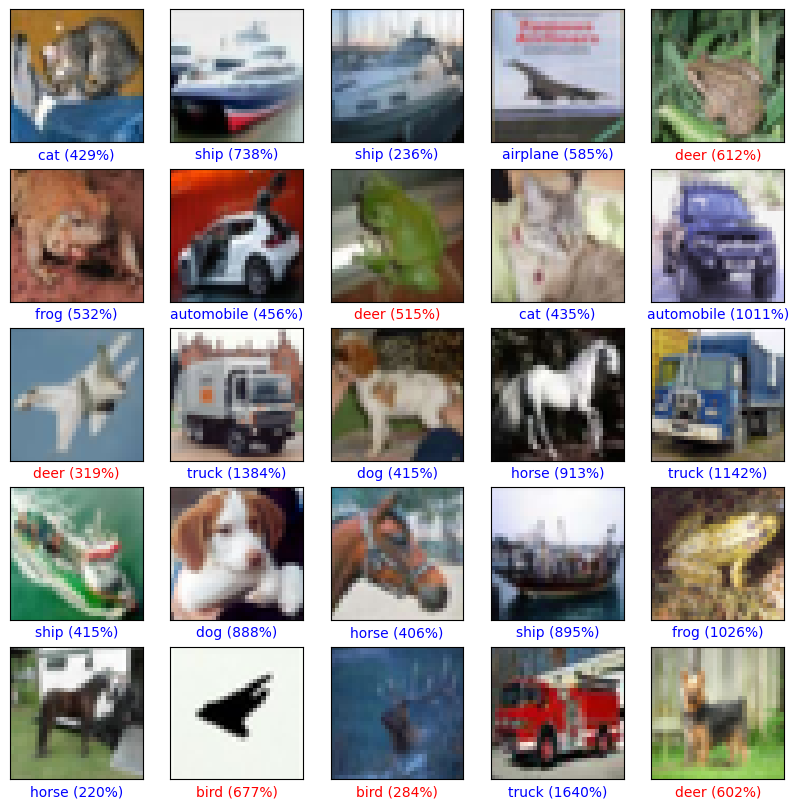

In [8]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    predictions = model.predict(test_images)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid (False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions[i]):2.0f}%)", color=color)

# Call the function to plot example predictions
plot_example_predictions()

# Transfer Learning

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [10]:
vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

In [12]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg_conv.layers[:-5]:
    layer.trainable = False


vgg_mod = Sequential()
vgg_mod.add(vgg_conv)
vgg_mod.add(Flatten())
vgg_mod.add(Dense(512, activation='relu'))
vgg_mod.add(BatchNormalization())
vgg_mod.add(Dropout(0.5))
vgg_mod.add(Dense(256, activation='relu'))
vgg_mod.add(BatchNormalization())
vgg_mod.add(Dense(128, activation='relu'))
vgg_mod.add(BatchNormalization())
vgg_mod.add(Dense(128, activation='relu'))
vgg_mod.add(BatchNormalization())
vgg_mod.add(Dropout(0.5))
vgg_mod.add(Dense(64, activation='relu'))

vgg_mod.add(Dense(10, activation='softmax'))

In [13]:
vgg_mod.summary()

ValueError: Undefined shapes are not supported.

In [199]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [218]:
#Compiling the Model

opt = optimizers.Adam (learning_rate=0.0001)
vgg_mod.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# vgg_mod.compile(optimizer = opt, #'adam',
#                 loss = CategoricalCrossentropy(), 
#                 metrics=['accuracy'])

In [220]:
# definig callbacks
checkpoint = ModelCheckpoint('vgg_mod.h5', monitor='val_cross', verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
red_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose = 1)

callbacks = [checkpoint, earlystop, red_lr]
#Clearing the cache memory after each epoch to free up the memory

class GarbageCollectorCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    gc.collect()

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=vgg_mod.h5

In [221]:
checkpoint = ModelCheckpoint('vgg_mod.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

earlystop = EarlyStopping (monitor='val_loss', patience=5, verbose=1)

red_lr = ReduceLROnPlateau (monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)



callbacks = [checkpoint, earlystop, red_lr]
#Clearing the cache memory after each epoch to free up the memory

class GarbageCollectorCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs=None):

    gc.collect()

ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=vgg_mod.h5